In [1]:
import pymongo
import pandas as pd

try:
    username = "id120"
    password = "pw120"
    host = "1.234.5.158"
    port = 37017
    dbname = "id120"
    
    # mongodb 접속
    conn= pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')
    db = conn.get_database(dbname) #db선택
    collection = db.get_collection("ex1_20210520") #collection == table과 비슷함
    
    data = collection.find({}, {'_id':0})
    df = pd.DataFrame(data)
    
    for tmp in data:
        print(tmp)
    
except Exception as e:
    print(e)
finally:
    conn.close()
df.head() # 앞쪽에것 5개만 출력

,id,name,age
0,aaa,가다라,22
1,aaa,다라마,32
2,aaa,바사아,42
3,aaa,가나다,12
4,aaa,가다라,22


In [7]:
import pandas as pd

# 수집한 데이터 [{},{},{}] = > mongodb, hadoop
data = [{"key":"aaa", "value":1}, {"key":"bbb", "value":2}, {"key":"ccc", "value":1}]

# 데이터 전처리 => 작업했음
df = pd.DataFrame(data)
df

,key,value
0,aaa,1
1,bbb,2
2,ccc,1


In [8]:
# dataframe to dict로 변환
data1 = df.to_dict(orient='records')
data1

[{'key': 'aaa', 'value': 1},
 {'key': 'bbb', 'value': 2},
 {'key': 'ccc', 'value': 1}]

In [17]:
import pymongo
import pandas as pd

try:
    username = "id120"
    password = "pw120"
    host = "1.234.5.158"
    port = 37017
    dbname = "id120"
    
    # mongodb접속
    conn = pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')
    db = conn.get_database(dbname)
    collection = db.get_collection("ex1_20210526") 
    
    collection.insert_many(data1)
except Exception as e:
    print(e)
finally:
    conn.close() 

In [13]:
# 이미지 다운로드
from selenium import webdriver  # pip install selenium
import bs4 # pip install bs4
import time
import urllib.request as REQ  #서버 요청

url = "https://shoppinghow.kakao.com/top"

# 옵션설정
options = webdriver.ChromeOptions()
options.add_argument("disable-gpu")   
options.add_argument("lang=ko_KR")  
# options.add_argument("headless")  # 크롬창이 표시되지 않음
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36')  # user-agent 

# 드라이브 로딩
driver = webdriver.Chrome(executable_path="driver/chromedriver.exe", options=options)

# 페이지 접속
driver.get(url)

# 로딩되는 시간이 있으므로 1초 기다림
time.sleep(1)

data4 = []
for idx in range(1, 11, 1):
    img = driver.find_element_by_xpath('//*[@id="topRecomKeywordWrap"]/div[2]/ul/li[' + str(idx) + ']/a/img')
    print(img.get_attribute("src"))
    # 서버요청(이미지의 url주소, 저장할 파일명)
    # REQ.urlretrieve( img.get_attribute("src"), f'download/image_{idx}.jpg' )
    data4.append(img.get_attribute("src"))
    print("-" * 30)

driver.close()

https://shop2.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop2.daumcdn.net%2Fshophow%2Fp%2FK13027911753.jpg%3Fut%3D20210423163707
------------------------------
https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FA5093002126.jpg%3Fut%3D20210503050522
------------------------------
https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FA4640578494.jpg%3Fut%3D20180403145101
------------------------------
https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FD5100076926.jpg%3Fut%3D20201127152141
------------------------------
https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FC5102277220.jpg%3Fut%3D20210404200157
------------------------------
https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FC5094271142.jpg%3Fut%3D20200903100937
------------------------------
https://s

In [15]:
# 이미지 링크를 이용하여 byte로 받기

import requests
import io
import bson
import time

data5 = [] # mongodb에 추가하기 위한 [{},{},{}] 로 저장하기 위한 변수
for idx, tmp in enumerate(data4):
    response = requests.get(tmp) #src 주소를 호출해서 값을 받아옴
    byte1 = io.BytesIO(response.content) # 받아온 값을 bytes로 변경함
    data5.append({"name":"이미지저장", "binary_data": bson.Binary(byte1.read())})
    print(idx, tmp)

0 https://shop2.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop2.daumcdn.net%2Fshophow%2Fp%2FK13027911753.jpg%3Fut%3D20210423163707
1 https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FA5093002126.jpg%3Fut%3D20210503050522
2 https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FA4640578494.jpg%3Fut%3D20180403145101
3 https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FD5100076926.jpg%3Fut%3D20201127152141
4 https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FC5102277220.jpg%3Fut%3D20210404200157
5 https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FC5094271142.jpg%3Fut%3D20200903100937
6 https://shop2.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop2.daumcdn.net%2Fshophow%2Fp%2FL13057102667.jpg%3Fut%3D20210426153137
7 https://shop1.daumcdn.net/thumb/R250x250/?fn

In [18]:
import pymongo
import pandas as pd

try:
    username = "id120"
    password = "pw120"
    host = "1.234.5.158"
    port = 37017
    dbname = "id120"
    
    # mongodb접속
    conn = pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')
    db = conn.get_database(dbname)
    collection = db.get_collection("images_20210526") 
    
    collection.insert_many(data5)
except Exception as e:
    print(e)
finally:
    conn.close() 

In [47]:
import pymongo

try:
    username = "id120"
    password = "pw120"
    host = "1.234.5.158"
    port = 37017
    dbname = "id120"
    
    # mongodb 접속
    conn= pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')
    db = conn.get_database(dbname) #db선택
    collection = db.get_collection("images_20210526") #collection == table과 비슷함
    
    data6 = collection.find({}, {'_id':0})
    
except Exception as e:
    print(e)
finally:
    conn.close()

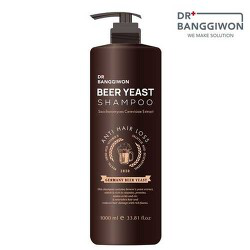

In [48]:
from PIL import Image
import io

# 가져온 데이터 이미지로 출력하기 [{},{},{}]
img1 = data6[3]['binary_data']

output = Image.open(io.BytesIO(img1)) #bytes를 _io.bytes 타입으로 변환
output

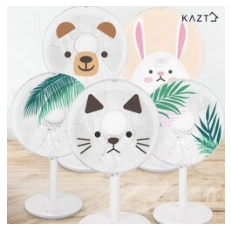

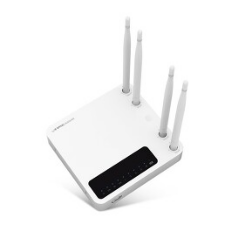

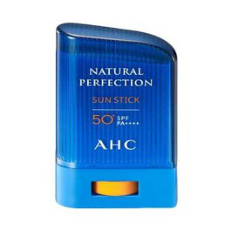

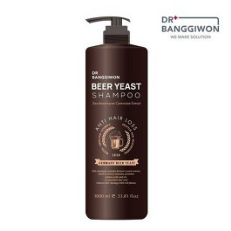

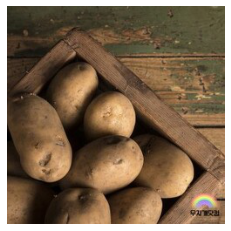

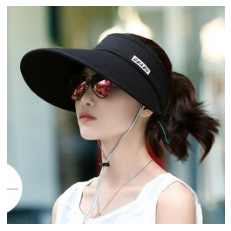

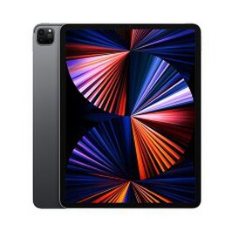

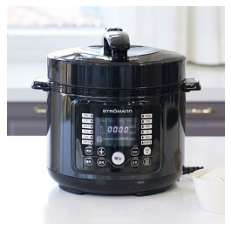

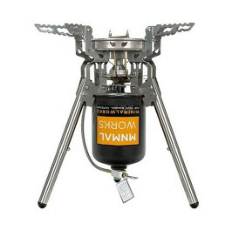

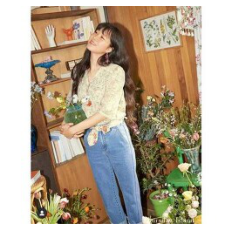

In [51]:
from PIL import Image
import matplotlib.pyplot as plt
import io

data6 = collection.find({}, {'_id':0})

for tmp in data6:
    plt.figure()
    plt.axis('off')
    plt.imshow(Image.open(io.BytesIO(tmp['binary_data'])))
plt.show()

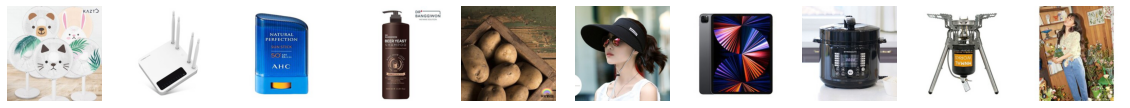

In [68]:
from PIL import Image
import matplotlib.pyplot as plt
import io

data6 = collection.find({}, {'_id':0})

plt.rcParams['figure.figsize'] = (20, 5) # 튜플

for idx, tmp in enumerate(data6):
    plt.subplot(1,10,idx+1)
    plt.axis('off')
    plt.imshow(Image.open(io.BytesIO(tmp['binary_data'])))
plt.show()

In [ ]:
# 몽고db 아이디 비번 없이
import pymongo

try:
    username = "id120"
    password = "pw120"
    host = "1.234.5.158"
    port = 37017
    dbname = "id120"
    
    # mongodb 접속
#     conn = pymongo.MongoClient(f'mongodb://{host}:{port}') # 암호없이 접속하기 host = "loacalhost", port = 27017
    conn= pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')
    db = conn.get_database(dbname) #db선택
    collection = db.get_collection("images_20210526") #collection == table과 비슷함
    
    data6 = collection.find({}, {'_id':0})
    
except Exception as e:
    print(e)
finally:
    conn.close()